## MVP - DANIEL SARAIVA PRADO
## Aplicando Aprendizado Supervisionado



In [73]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing  # Carregar o dataset California Housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression  # Regressão Linear
from sklearn.ensemble import RandomForestRegressor  # Regressão com Random Forest
from sklearn.svm import SVR  # Regressão com Support Vector Machine
from sklearn.neighbors import KNeighborsRegressor  # Regressão com K-Nearest Neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
# 1. Carregando o dataset California Housing
data = fetch_california_housing()

# 2. Convertendo para DataFrame para facilitar a análise
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Adicionando a variável alvo (preço médio das casas)

dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
# 3. Exibindo uma breve descrição do dataset
print(data.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

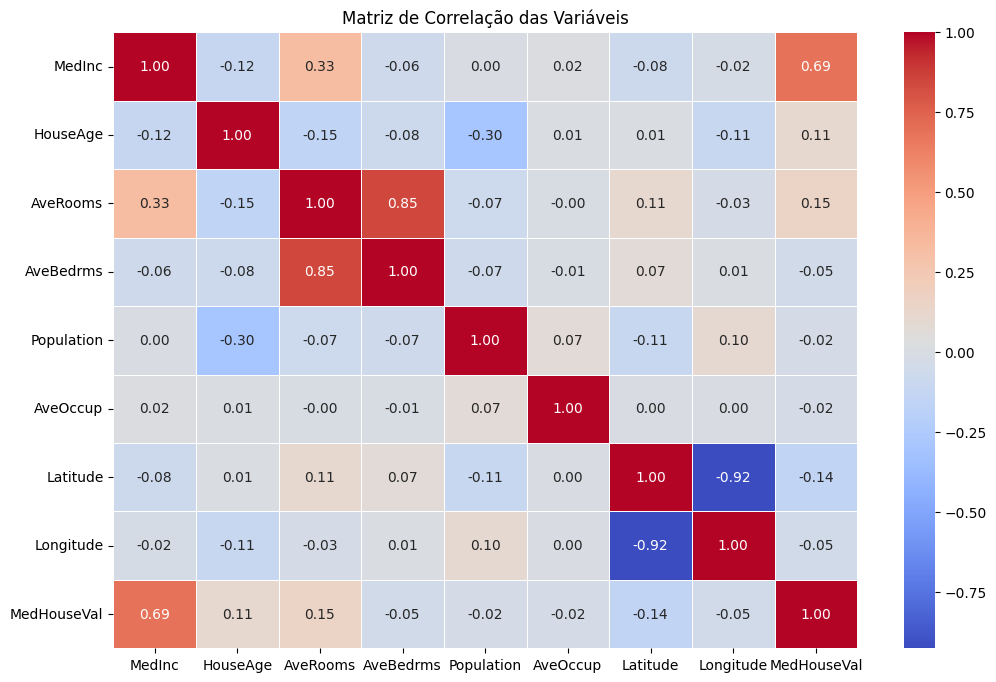

In [75]:
# 4. Analisando a correlação das variáveis
correlation_matrix = df.corr()

# 4. Visualizando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis')
plt.show()


In [77]:
# 5. Analisando a correlação das variáveis com o preço médio das casas (MedHouseVal)
correlation_with_target = correlation_matrix['MedHouseVal'].sort_values(ascending=False)

print("\nCorrelação das variáveis com o preço médio das casas (MedHouseVal):")
print(correlation_with_target)


Correlação das variáveis com o preço médio das casas (MedHouseVal):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


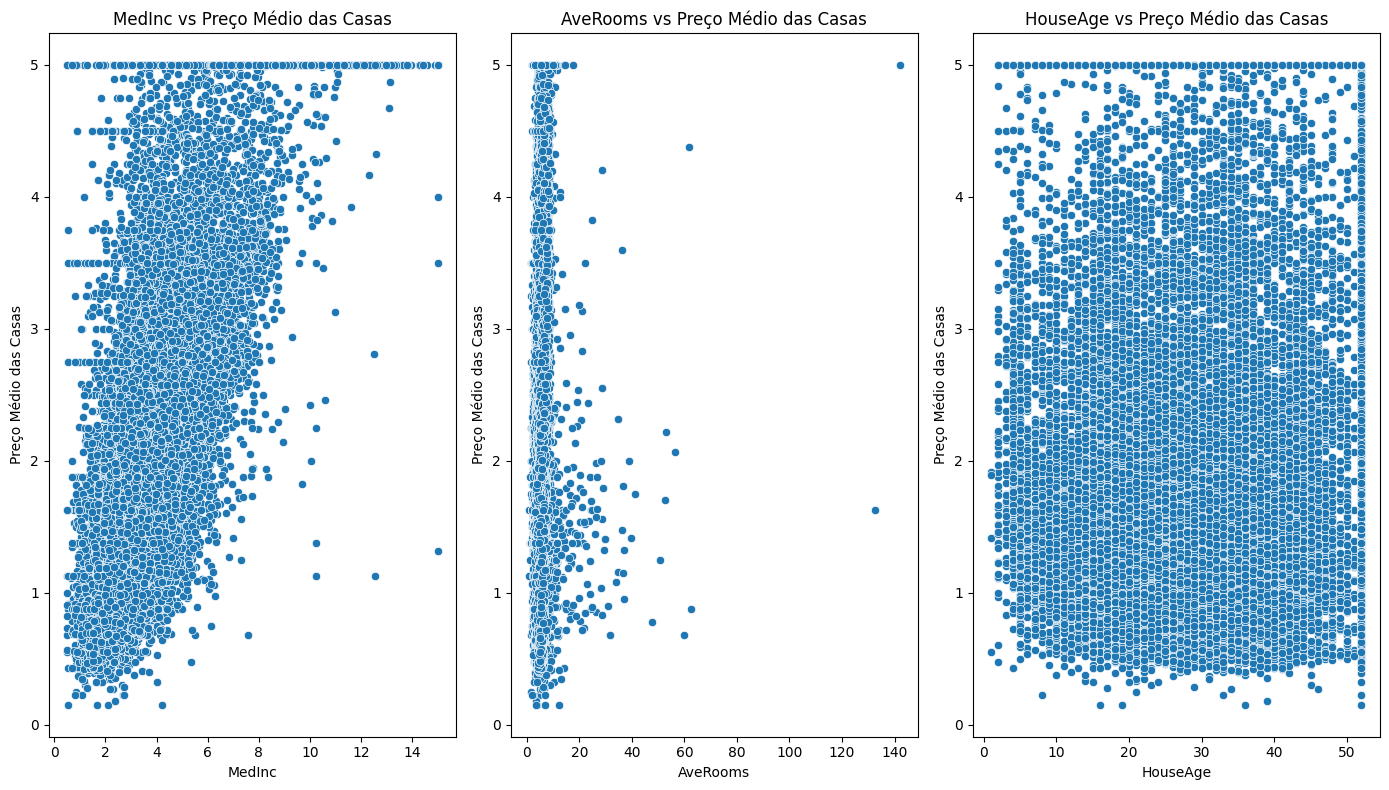

In [78]:
# 6. Gráficos de dispersão para as variáveis mais correlacionadas com o preço
# Vamos visualizar as variáveis com maior correlação com o preço médio das casas

top_correlated_features = correlation_with_target.index[1:4]  # As 3 variáveis mais correlacionadas com o preço

plt.figure(figsize=(14, 8))

for i, feature in enumerate(top_correlated_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[feature], y=df['MedHouseVal'])
    plt.title(f'{feature} vs Preço Médio das Casas')
    plt.xlabel(feature)
    plt.ylabel('Preço Médio das Casas')

plt.tight_layout()
plt.show()

In [79]:
# 7. Preparação dos dados para o treinamento dos modelos
X = df.drop(columns=['MedHouseVal'])  # Removendo a variável alvo
y = df['MedHouseVal']  # Preço médio das casas (variável alvo)


In [80]:
# 8. Dividindo os dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# 9. Normalizando os dados para que todas as variáveis tenham a mesma escala
scaler = StandardScaler()

# Ajustando e transformando os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformando os dados de teste (usando o mesmo ajuste do treino)
X_test_scaled = scaler.transform(X_test)

In [82]:
# 10. Definindo os modelos de regressão
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

In [83]:
# 11. Realizando Cross-validation para os modelos
cv_results = {}

for model_name, model in models.items():
    # Realizando cross-validation para cada modelo, utilizando MSE negativo (para minimização do erro)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_results[model_name] = {
        'MSE': -cv_scores.mean(),  # Convertendo de negativo para positivo
        'Std': cv_scores.std()     # Desvio padrão das pontuações de validação
    }

# Exibindo os resultados da validação cruzada para cada modelo
print("\nResultados da Cross-validation (MSE):")
for model_name, result in cv_results.items():
    print(f"{model_name}: MSE = {result['MSE']:.4f} | Desvio Padrão = {result['Std']:.4f}")



Resultados da Cross-validation (MSE):
Linear Regression: MSE = 0.5193 | Desvio Padrão = 0.0149
Random Forest Regressor: MSE = 0.2616 | Desvio Padrão = 0.0045
Support Vector Regressor: MSE = 0.3518 | Desvio Padrão = 0.0125
K-Nearest Neighbors Regressor: MSE = 0.4230 | Desvio Padrão = 0.0158


In [84]:
# 12. Selecionando o modelo com a melhor acurácia (menor MSE)
best_model_name = min(cv_results, key=lambda x: cv_results[x]['MSE'])
best_model = models[best_model_name]

In [85]:
# 13. Treinando o modelo selecionado com todos os dados de treino
best_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [86]:
# 14. Avaliando o modelo selecionado no conjunto de teste
y_pred = best_model.predict(X_test_scaled)

# Calculando o erro quadrático médio (MSE) e o R² para o modelo escolhido
mse_best = mean_squared_error(y_test, y_pred)
r2_best = r2_score(y_test, y_pred)

# Exibindo as métricas de avaliação para o modelo escolhido
print(f"\nModelo selecionado: {best_model_name}")
print(f"Erro Quadrático Médio (MSE) no Conjunto de Teste: {mse_best:.4f}")
print(f"Coeficiente de Determinação (R²) no Conjunto de Teste: {r2_best:.4f}")



Modelo selecionado: Random Forest Regressor
Erro Quadrático Médio (MSE) no Conjunto de Teste: 0.2552
Coeficiente de Determinação (R²) no Conjunto de Teste: 0.8053


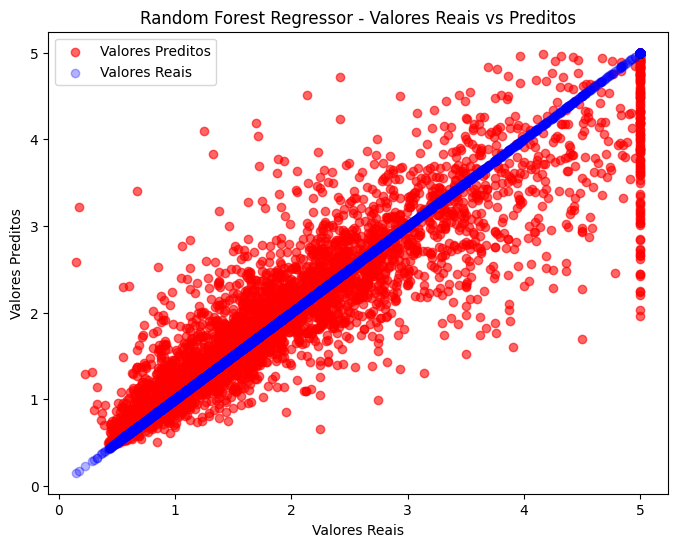

In [88]:
# 15. Visualizando os resultados das previsões

# Gráfico de dispersão entre os valores reais e os valores previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', label='Valores Preditos', alpha=0.6)
plt.scatter(y_test, y_test, color='blue', label='Valores Reais', alpha=0.3)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title(f'{best_model_name} - Valores Reais vs Preditos')
plt.legend()
plt.show()

In [89]:
# 16. Gerando novos dados com características mais altas para valores de casas mais caros

# Aumentando algumas variáveis para simular uma área mais valorizada
new_data_high_value = np.array([
    [6.0, 10.0, 4.0, 0.2, 4.5, 25.0, 3000.0, 5.0]  # Modificando valores para tornar a casa mais cara
])

# Normalizando os novos dados utilizando o mesmo escalador ajustado para o conjunto de treinamento
new_data_scaled = scaler.transform(new_data_high_value)

# Prevendo o preço médio das casas para os novos dados com o modelo escolhido
new_prediction = best_model.predict(new_data_scaled)

# Exibindo os resultados das previsões para os novos dados
print(f"\nPrevisão do preço médio das casas para os novos dados (modelo {best_model_name}): ${new_prediction[0]:.2f}")


Previsão do preço médio das casas para os novos dados (modelo Random Forest Regressor): $1.70



***# Explicação do Código***

---


---


**1. Carregamento e Preparação dos Dados:**

 O código começa carregando o dataset California Housing com a função fetch_california_housing.

  Os dados são divididos entre variáveis independentes (X) e a variável dependente (y, o preço médio das casas).

**2. Normalização:**

  Como o dataset contém variáveis com escalas muito diferentes, a normalização é realizada usando StandardScaler. Isso garante que todas as variáveis tenham média 0 e desvio padrão 1, o que é importante para a performance de modelos baseados em distância e outros algoritmos sensíveis à escala.

**3. Validação Cruzada e Treinamento de Modelos:**

O código define quatro modelos de regressão para comparação:

1.   Regressão Linear

2.   Random Forest Regressor

3.   Support Vector Regressor (SVR)

4.   K-Nearest Neighbors (KNN)

A validação cruzada (cross-validation) é usada para avaliar a performance
dos modelos, utilizando o erro quadrático médio (MSE) como métrica.

O melhor modelo, com menor MSE, é selecionado para treinar nos dados completos.

**4. Gerando Novos Dados de Entrada:**

Para gerar novos dados que resultem em preços mais altos, o código cria um novo exemplo com valores ajustados para as características associadas a áreas de maior valor:

1.  MedInc (renda média) é aumentada.

2.  AveRooms (média de quartos) e AveOccup (ocupação) são ajustadas para simular uma área mais densa e com casas maiores.

3.  Longitude e Latitude são ajustados para indicar uma área mais cara, como uma área próxima de grandes cidades ou bairros nobres.

**5. Previsão para Novos Dados:**
O modelo selecionado (o melhor modelo da validação cruzada) faz a previsão do preço médio da casa para os novos dados, simulando um preço mais alto.

**6. Cálculo da Correlação:**

A matriz de correlação é gerada utilizando df.corr(), que calcula a correlação entre todas as variáveis do dataframe. A correlação é uma medida de como duas variáveis estão relacionadas: valores próximos de 1 indicam uma forte correlação positiva, enquanto valores próximos de -1 indicam uma forte correlação negativa.

**7. Visualização da Correlação:**

Usamos seaborn para gerar um heatmap da matriz de correlação. O gráfico exibe como as variáveis estão correlacionadas entre si e com a variável alvo MedHouseVal (preço médio das casas). A função sns.heatmap permite mostrar essa matriz de uma forma fácil de visualizar.

**8. Análise das Variáveis Correlacionadas:**
O código exibe as variáveis mais correlacionadas com o preço médio das casas (MedHouseVal) usando correlation_with_target. Isso ajuda a entender quais atributos mais influenciam o preço médio das casas.

**9. Gráficos de Dispersão:**
Foram gerados gráficos de dispersão para as variáveis mais correlacionadas com o preço médio das casas. O código exibe as três variáveis com maior correlação com o preço médio (MedHouseVal) e gera um gráfico de dispersão entre cada uma delas e o preço médio.